In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv('customer_segmentation.csv')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [16]:

data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])


In [17]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [18]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [19]:
data = data.dropna()

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
data_scaled

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

In [24]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    
    inertia_values.append(kmeans.inertia_)
   
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

In [25]:
inertia_values

[20124.071092802522,
 13014.664681611672,
 9801.312707154426,
 8531.050588815437,
 7323.934017203183,
 6309.327486234028,
 5837.207684091997,
 5495.21796838509,
 5230.415340103146]

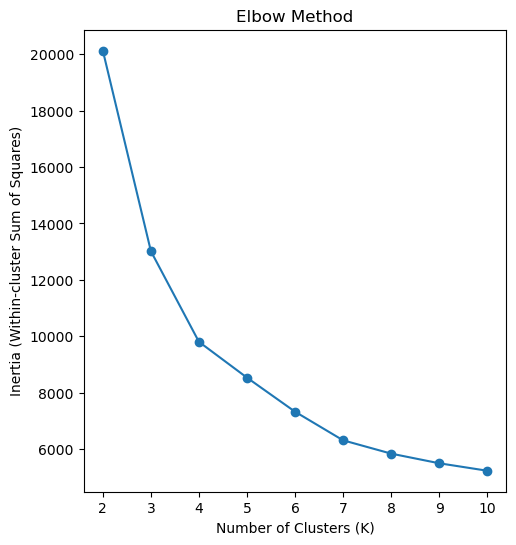

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

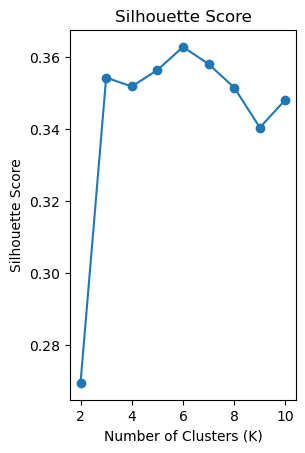

In [27]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [28]:
elbow_K = 3  
silhouette_K = 4 

print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4
